In [170]:
import pandas as pd
import matplotlib
%matplotlib inline

In [222]:
df = pd.read_csv("/Users/thorjakobsen/GIT/JasminFuzzer/evaluation/data/results_30000_50000.csv")

# General about generated programs

In the following the def. of a safe program is a program that is compilled without errors and which has no errors or safety violation.

In [223]:
print("Amount of programs: ", df.shape[0])
print("Amount of safe programs: ", df.loc[(df.Errors == "[[], []]") & df.Safe == True].shape[0])

Amount of programs:  20000
Amount of safe programs:  11673


## Program generation time and safety check time

Fastest time:  0.00047898292541503917
Sloweset time:  0.17535996437072754
Average time:  0.003682586097717285


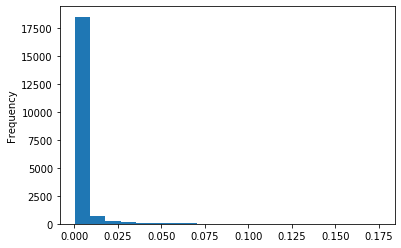

In [224]:
print("Fastest time: ", df.GenerationTime.min())
print("Sloweset time: ", df.GenerationTime.max())
print("Average time: ", df.GenerationTime.mean())
df.GenerationTime.plot.hist(bins=20)

Fastest time:  0.017345905303955078
Sloweset time:  9676.818602085114
Average time:  0.6774673286676407


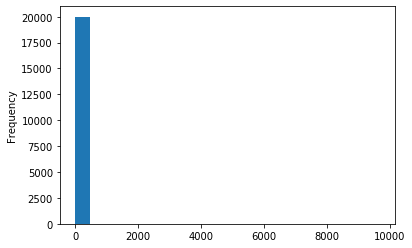

In [225]:
print("Fastest time: ", df.SafetyCheckTime.min())
print("Sloweset time: ", df.SafetyCheckTime.max())
print("Average time: ", df.SafetyCheckTime.mean())
df.SafetyCheckTime.plot.hist(bins=20)

## Program sizes

Smallets size of program:  103
Largest size of program:  10798
Average size of program:  140000.0


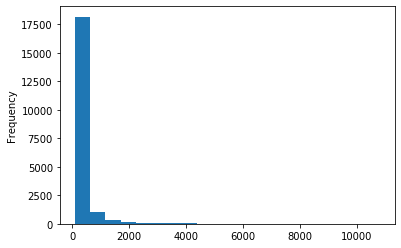

In [226]:
print("Smallets size of program: ", df.Size.min())
print("Largest size of program: ", df.Size.max())
print("Average size of program: ", df.size.mean())
df.Size.plot.hist(bins=20)

In [227]:
import base64 

df_errors = df.Errors.values
compiler_error_codes = {}
safety_error_codes = {}

def hasher(s):
    return str(hash(s))[:7]

def get_error_codes(i):
    
    safety_check = i.startswith("[[], ['")
    lists = i.split("['")
    final_list = [[],[]]
    
    if not isinstance(i, list) and i == "[[], []]":
        
        return final_list
    
    for j in range(1, len(lists)):
    
        internal_list = lists[j].split("']")[0]
        error_list = internal_list.split("', '")

        if j == 2 or (j == 1 and safety_check):
            for l in error_list:
                hash_error = hasher(l)
                if hash_error in safety_error_codes:
                    final_list[1].append(hash_error)
                else:
                    safety_error_codes[hash_error] = l
                    final_list[1].append(hash_error)
        else:
            for l in error_list:
                hash_error = hasher(l)
                if hash_error in compiler_error_codes:
                    final_list[0].append(hash_error)
                else:
                    compiler_error_codes[hash_error] = l
                    final_list[0].append(hash_error)
                    
    return final_list

for i in range(0, df.shape[0]):

    result = get_error_codes(df_errors[i])
    df.at[i, "Errors"] = result

In [228]:
for i in compiler_error_codes:
    print(i, compiler_error_codes[i])

-730259 WARNING: CAN NOT FIND IINFO 1
1650727 compilation error in functions f0 and f0 at position line -1: assembler error Invalid pexpr for word
2507855 PLEASE REPORT
2793801 compilation error in functions f0 and f0 at position line 7: assembler error Invalid pexpr for word
2384325 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 14 (1-17), variables result and b1 will be merged to v0
3560819 compilation error in functions main and main at position line 6 from line 14: assembler error Invalid pexpr for word
-439474 compilation error in functions main and main at position line 11 from line 26: assembler error Invalid pexpr for word
2345471 compilation error in functions f0 and f0 at position line 13: assembler error Invalid pexpr for word
7876504 compilation error in functions f0 and f0 at position line 11: assembler error Invalid pexpr for word
6245672 Register allocation: no register bank for type bool
-691689 WARNING: at /Users/thorjakobsen/GIT

2955010 compilation error in functions main and main at position line 9 from line 28: assembler error Invalid pexpr for word
9179535 Register allocation at line line -1: variable  _7.142 must be allocated to conflicting register ZF.78
1630704 compilation error in functions main and main at position line 21 from line 30: assembler error Invalid pexpr for word
-153966 compilation error in functions f0 and f0 at position line 61: assembler error: invalid condition 
-214432 (~ (((64u) 9965) == (RDI.48 * ((64u) 8056))))
-351587 WARNING: at line 16 from line 27, LEA instruction is used
-371798 compilation error in functions main and main at position line 15 from line 27: assembler error: invalid condition 
-193450 ((~ PF.76) || ZF.78)
4383252 Register allocation at line line -1: variable  _5.147 must be allocated to conflicting register PF.76
7188737 compilation error in functions main and main at position line 6 from line 21: assembler error: invalid condition 
3132095 (~ (RAX.41 <=u (RAX.4

In [229]:
for i in safety_error_codes:
    print(i, safety_error_codes[i])

-886301 Fatal error: exception Failure("Environment.dim_of_var: unknown variable in the environment")
2384325 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 14 (1-17), variables result and b1 will be merged to v0
3831241 Fatal error: exception File "src/safety.ml", line 3550, characters 16-22: Assertion failed
-691689 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 12 (1-17), variables result and b1 will be merged to v0
1821705 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 16 (1-17), variables result and b1 will be merged to v0
-435785 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 15 (1-17), variables result and b1 will be merged to v0
4123304 WARNING: at /Users/thorjakobsen/GIT/jasmin/compiler/tests/jasminFuzzer/test.jazz: line 17 (1-17), variables result and b1 will be merged to v0
4675221 WARNING: at /Users/thorjakobsen/GIT/